## WeatherPy

**Note**

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [38]:
city_name = 'Atlanta'
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&q={city_name}&appid={weather_api_key}"
data = requests.get(url).json()

data

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [6]:
# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="

# List of city data
cname = []
ccountry = []
clat = []
clng = []
chum = []
ctemp = []
cmtemp = []
ccloud = []
cwind = []

# Print to logger
print('Start Data Retrieval')
print('--------------------')

# Create counters
total = 1
group = 1

# Loop through all the cities in our list
for city in cities:

    
    # Group cities in sets of 50 for logging purposes
    if total > 50:
        group +=1
        total = 1
    # Create endpoint URL with each city
    send_url = url + city
    
    # Log the url, record, and set numbers
    
    # Add 1 to the record count
    total += 1
    
    # Run an API request for each of the cities
    data = requests.get(send_url).json()
        # Parse the JSON and retrieve data
    try:
        print(f'Handling {city}, Number: {total} of Group {group}')
        # Parse out the max temp, humidity, and cloudiness
        
        # Append the City information into city_data list
        cname.append(data['name'])
        ccountry.append(data['sys']['country'])
        clat.append(data['coord']['lat'])
        clng.append(data['coord']['lon'])
        chum.append(data['main']['humidity'])
        ctemp.append(data['main']['temp'])
        cmtemp.append(data['main']['temp_max'])
        ccloud.append(data['clouds']['all'])
        cwind.append(data['wind']['speed'])
        
    # If an error is experienced, skip the city
    except:
        print(f'{city} not found, skipping item')
# Indicate that Data Loading is complete 
print('----------------')
print('City Data Pulled')
print('----------------')

Start Data Retrieval
--------------------
Handling karamea, Number: 2 of Group 1
karamea not found, skipping item
Handling kodiak, Number: 3 of Group 1
Handling khatanga, Number: 4 of Group 1
Handling ushuaia, Number: 5 of Group 1
Handling saskylakh, Number: 6 of Group 1
Handling port blair, Number: 7 of Group 1
Handling butaritari, Number: 8 of Group 1
Handling amuntai, Number: 9 of Group 1
Handling hasaki, Number: 10 of Group 1
Handling ambunti, Number: 11 of Group 1
Handling kapaa, Number: 12 of Group 1
Handling nanortalik, Number: 13 of Group 1
Handling castro, Number: 14 of Group 1
Handling albany, Number: 15 of Group 1
Handling punta arenas, Number: 16 of Group 1
Handling nizhneyansk, Number: 17 of Group 1
nizhneyansk not found, skipping item
Handling chuy, Number: 18 of Group 1
Handling bongor, Number: 19 of Group 1
Handling georgetown, Number: 20 of Group 1
Handling jamestown, Number: 21 of Group 1
Handling tasiilaq, Number: 22 of Group 1
Handling lebu, Number: 23 of Group 1
Ha

Handling itaituba, Number: 39 of Group 4
Handling roma, Number: 40 of Group 4
Handling havoysund, Number: 41 of Group 4
Handling kaitangata, Number: 42 of Group 4
Handling odesskoye, Number: 43 of Group 4
Handling grindavik, Number: 44 of Group 4
Handling whitehorse, Number: 45 of Group 4
Handling chalchihuites, Number: 46 of Group 4
Handling codrington, Number: 47 of Group 4
Handling paamiut, Number: 48 of Group 4
Handling arraial do cabo, Number: 49 of Group 4
Handling kununurra, Number: 50 of Group 4
Handling kloulklubed, Number: 51 of Group 4
Handling manggar, Number: 2 of Group 5
Handling praia da vitoria, Number: 3 of Group 5
Handling mgachi, Number: 4 of Group 5
Handling touros, Number: 5 of Group 5
Handling tura, Number: 6 of Group 5
Handling south daytona, Number: 7 of Group 5
Handling collie, Number: 8 of Group 5
Handling raudeberg, Number: 9 of Group 5
Handling barra do garcas, Number: 10 of Group 5
Handling hobyo, Number: 11 of Group 5
Handling pisco, Number: 12 of Group 5


Handling niquero, Number: 25 of Group 8
Handling zyryanka, Number: 26 of Group 8
Handling adrar, Number: 27 of Group 8
Handling lolua, Number: 28 of Group 8
lolua not found, skipping item
Handling metro, Number: 29 of Group 8
Handling lata, Number: 30 of Group 8
Handling smithers, Number: 31 of Group 8
Handling reporoa, Number: 32 of Group 8
Handling shadegan, Number: 33 of Group 8
Handling halalo, Number: 34 of Group 8
halalo not found, skipping item
Handling namibe, Number: 35 of Group 8
Handling pizarro, Number: 36 of Group 8
Handling vagay, Number: 37 of Group 8
Handling impfondo, Number: 38 of Group 8
Handling lasa, Number: 39 of Group 8
Handling sisimiut, Number: 40 of Group 8
Handling pemberton, Number: 41 of Group 8
Handling okato, Number: 42 of Group 8
Handling baghmara, Number: 43 of Group 8
Handling kutum, Number: 44 of Group 8
Handling bad wildungen, Number: 45 of Group 8
Handling clyde river, Number: 46 of Group 8
Handling cap malheureux, Number: 47 of Group 8
Handling ini

Handling timmins, Number: 18 of Group 12
Handling tela, Number: 19 of Group 12
Handling rorvik, Number: 20 of Group 12
Handling vila velha, Number: 21 of Group 12
Handling channel-port aux basques, Number: 22 of Group 12
Handling beaufort, Number: 23 of Group 12
Handling dubki, Number: 24 of Group 12
Handling maulvi bazar, Number: 25 of Group 12
maulvi bazar not found, skipping item
Handling viedma, Number: 26 of Group 12
Handling holbeach, Number: 27 of Group 12
Handling honjo, Number: 28 of Group 12
Handling shizukuishi, Number: 29 of Group 12
Handling buluang, Number: 30 of Group 12
Handling abapo, Number: 31 of Group 12
Handling kushiro, Number: 32 of Group 12
Handling terryville, Number: 33 of Group 12
Handling jacqueville, Number: 34 of Group 12
Handling jiaozuo, Number: 35 of Group 12
Handling salym, Number: 36 of Group 12
Handling mangrol, Number: 37 of Group 12
Handling vardo, Number: 38 of Group 12
Handling tadine, Number: 39 of Group 12
Handling la asuncion, Number: 40 of Gr

### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [12]:
# Convert array of JSONs into Pandas DataFrame
cityweather = pd.DataFrame({'City' : cname,
    'Country' : ccountry,
    'Lat' : clat,
    'Long' : clng,
    'Humidity' : chum,
    'Temperature' : ctemp,
    'Max Temp' : cmtemp,
    'Cloudiness' : ccloud,
    'Wind Speed' : cwind
    })
# Show Record Count
len(cityweather)

553

In [13]:
# Display the City Data Frame
cityweather

,City,Country,Lat,Long,Humidity,Temperature,Max Temp,Cloudiness,Wind Speed
0,Saint Paul Harbor,US,57.79,-152.41,75,44.60,44.60,90,6.93
1,Khatanga,RU,71.97,102.50,85,7.18,7.18,50,8.79
2,Ushuaia,AR,-54.80,-68.30,75,42.80,42.80,75,28.86
3,Saskylakh,RU,71.92,114.08,97,20.79,20.79,100,6.51
4,Port Blair,IN,11.67,92.75,83,80.53,80.53,100,14.67
...,...,...,...,...,...,...,...,...,...
548,La Asuncion,VE,11.03,-63.86,78,78.80,78.80,0,6.93
549,Rodrigues Alves,BR,-7.74,-72.65,40,92.68,92.68,23,4.99
550,Bhaderwah,IN,32.98,75.72,41,53.82,53.82,0,2.48
551,Lashio,MM,22.93,97.75,98,65.07,65.07,100,0.63


### Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [37]:
humover100 = cityweather.loc[cityweather['Humidity'] > 100]
humover100
#No Cities over 100% humidity, moving down cell two cells as instructed

,City,Country,Lat,Long,Humidity,Temperature,Max Temp,Cloudiness,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [40]:
# Extract relevant fields from the data frame
humidity = cityweather['Humidity']
cloudiness = cityweather['Cloudiness']
windspeed = cityweather['Wind Speed']
latitude = cityweather['Lat']
longitude = cityweather['Long']
temperature = cityweather['Max Temp']

# Export the City_Data into a csv
cityweather.to_csv("Output/cityweather.csv", index=True, index_label="City Number", header=True)

### Latitude vs. Temperature Plot

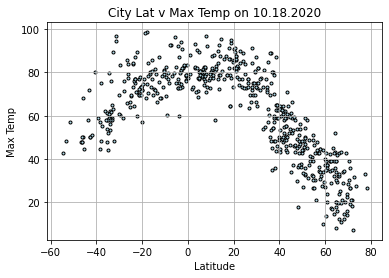

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(latitude, temperature, marker='.', color='lightblue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Lat v Max Temp on 10.18.2020')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('Plots/latvmtemp.png')

# Show plot
plt.show()

The plot above demonstrates that temperatures are higher the closer you are to 0 Latitude (the Equator). Interestingly, the drop in temperatures is more dramatic in the Northern Hemisphere vs the Southern, but all things considered at this day and time, the Southern Hemisphere is beginning to transition to Summer as the Northern is beginning to transition to Winter, which likely accounts for these differences. 

### Latitude vs. Humidity Plot

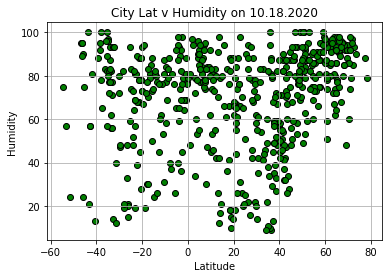

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latitude, humidity, marker='o', color='green', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Lat v Humidity on 10.18.2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('Plots/latvhum.png')

# Show plot
plt.show()

There's not a lot immediately evident from this plot. There seems to be a pretty equal distribrution of of plots across all latitudes. There's definitely a cluster of higher levels of humidity in the Northern hemisphere, which may partly be due to an elongated and stronger storm season than normal this year with a predicted 32 named storms.

### Latitude vs. Cloudiness Plot

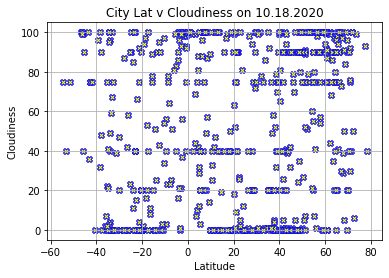

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitude, cloudiness, marker='X', color='yellow', edgecolor='blue')

# Incorporate the other graph properties
plt.title('City Lat v Cloudiness on 10.18.2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('Plots/latvcloud.png')

# Show plot
plt.show()

Nothing in this plot jumps out in regard to any sort of correlation of data points. They seem very equally distributed, with either large clusters at the top or bottom indicating that right now, skies are most either very clear or very cloudy depending on where you are. 

### Latitude vs. Wind Speed Plot

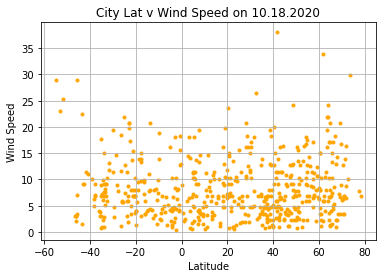

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitude, windspeed, marker='.', color='orange')

# Incorporate the other graph properties
plt.title('City Lat v Wind Speed on 10.18.2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('Plots/latvwspeed.png')

# Show plot
plt.show()

There's not much to gather in regard to any sort of correlation between Latitude and Windspeed. Its seems as though in general wind speeds are low relatively speaking today. 

### Linear Regression

In [60]:
# Create a function to create Linear Regression plots
def plotlinreg(x_values, y_values, ax=None, **kwargs):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regval = slope * x_values + intercept
    line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax = ax
    ax.plot(x_values, regval, color='red')
    print(f'The R Value is {rvalue}')
    return ax, line_eq

In [57]:
# Create Northern and Southern Hemisphere DataFrames
norhem = cityweather[cityweather['Lat'] >= 0]
nhumidity = norhem['Humidity']
ncloudiness = norhem['Cloudiness']
nwindspeed = norhem['Wind Speed']
nlatitude = norhem['Lat']
nlongitude = norhem['Long']
ntemperature = norhem['Max Temp']

souhem = cityweather[cityweather['Lat'] <= 0]
shumidity = souhem['Humidity']
scloudiness = souhem['Cloudiness']
swindspeed = souhem['Wind Speed']
slatitude = souhem['Lat']
slongitude = souhem['Long']
stemperature = souhem['Max Temp']

### Max Temp vs. Latitude Linear Regression

The R Value is -0.8840698108130641


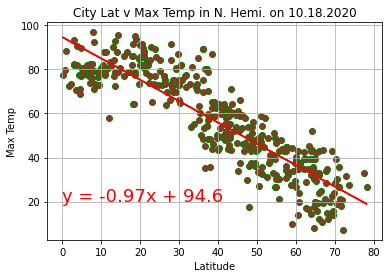

In [79]:
# Linear regression on Northern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(nlatitude, ntemperature, marker='o', color='brown', edgecolor='green')
plt.title('City Lat v Max Temp in N. Hemi. on 10.18.2020')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(nlatitude, ntemperature, ax)
plt.annotate(line_eq,(0,20),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrnlatvmtemp.png')
plt.show()

The R Value is 0.6665434040718015


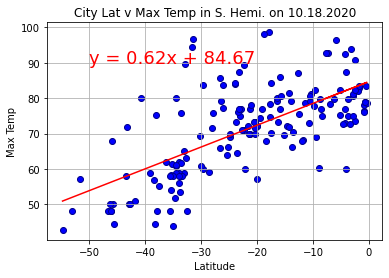

In [78]:
# Linear regression on Southern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(slatitude, stemperature, marker='o', color='blue', edgecolor='darkblue')
plt.title('City Lat v Max Temp in S. Hemi. on 10.18.2020')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(slatitude, stemperature, ax)
plt.annotate(line_eq,(-50,90),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrslatvmtemp.png')
plt.show()

Both of our Lin. Reg. plots for Max Temp v Latitude continue to prove our earlier observation that max temp has a direct correlation with our Lattitude. The closer to zero, the higher the max temp. We seem to have instances of more clustering in the Southern Hemisphere, where as the Northern Hemisphere more clearly follows the regression annotation. 

### Humidity (%) vs. Latitude Linear Regression

The R Value is 0.29970278703769704


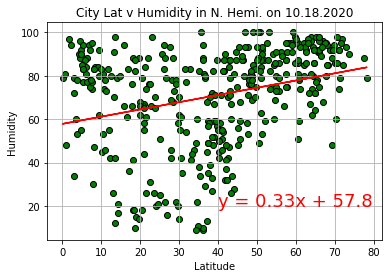

In [82]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(nlatitude, nhumidity, marker='o', color='green', edgecolor='black')
plt.title('City Lat v Humidity in N. Hemi. on 10.18.2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(nlatitude, nhumidity, ax)
plt.annotate(line_eq,(40,20),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrnlatvhum.png')
plt.show()

The R Value is 0.015118278481821953


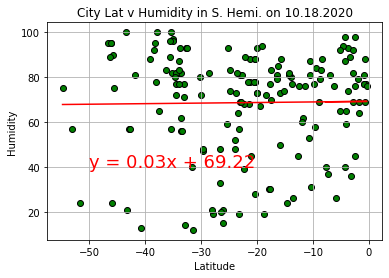

In [83]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(slatitude, shumidity, marker='o', color='green', edgecolor='black')
plt.title('City Lat v Humidity in S. Hemi. on 10.18.2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(slatitude, shumidity, ax)
plt.annotate(line_eq,(-50,40),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrslatvhum.png')
plt.show()

There's still not a lot innately clear about any sort of relationship between Latitude and Humidity. The regression plot does help to begin identifying any potential relationship, but I believe humidity isn't necessarily attached to latitude itself. 

### Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.1958048521658703


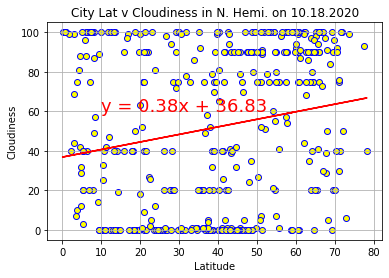

In [89]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(nlatitude, ncloudiness, marker='o', color='yellow', edgecolor='blue')
plt.title('City Lat v Cloudiness in N. Hemi. on 10.18.2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(nlatitude, ncloudiness, ax)
plt.annotate(line_eq,(10,60),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrnlatvcloud.png')
plt.show()



The R Value is 0.0864535602005104


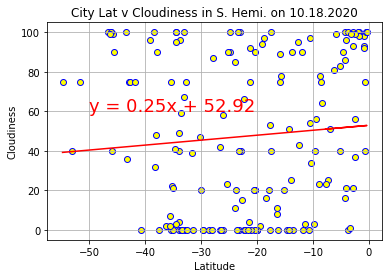

In [90]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(slatitude, scloudiness, marker='o', color='yellow', edgecolor='blue')
plt.title('City Lat v Cloudiness in S. Hemi. on 10.18.2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(slatitude, scloudiness, ax)
plt.annotate(line_eq,(-50,60),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrslatvcloud.png')
plt.show()

Like previously, the plots for Cloudiness doesn't inherently provide any insights. Interestingly, between the two plots, there are a large number of entries whom have clear skies today. 

### Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.12741410964318917


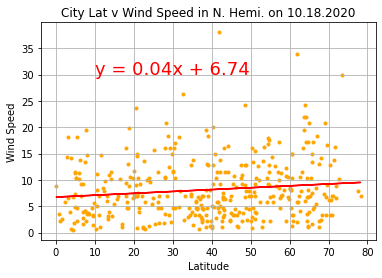

In [92]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(nlatitude, nwindspeed, marker='.', color='orange')
plt.title('City Lat v Wind Speed in N. Hemi. on 10.18.2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(nlatitude, nwindspeed, ax)
plt.annotate(line_eq,(10,30),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrnlatvwspeed.png')
plt.show()

The R Value is -0.1944094951013415


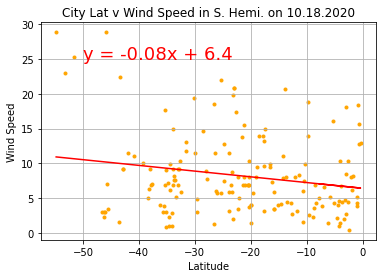

In [94]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(slatitude, swindspeed, marker='.', color='orange')
plt.title('City Lat v Wind Speed in S. Hemi. on 10.18.2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()
ax, line_eq = plotlinreg(slatitude, swindspeed, ax)
plt.annotate(line_eq,(-50,25),fontsize=18,color='red')

# Save the figure
plt.savefig('Plots/lrslatvwspeed.png')
plt.show()

There doesn't seem to be a lot of observable overlap between the two plots outside of the equal distribution of data points across both plots. There are some outliers, mainly with the Northern Hemisphere which has a larger observable range of wind speeds than the Southern Hemisphere. 